Number plate detection using pytessract and ocr method


In [ ]:
!apt-get install -y tesseract-ocr
!pip install pytesseract
!wget https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_russian_plate_number.xml

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 29 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (4,230 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 126209 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving car_img.png to car_img.png


Detected Plate Number: ETS56VDE
State: State not recognized


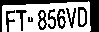

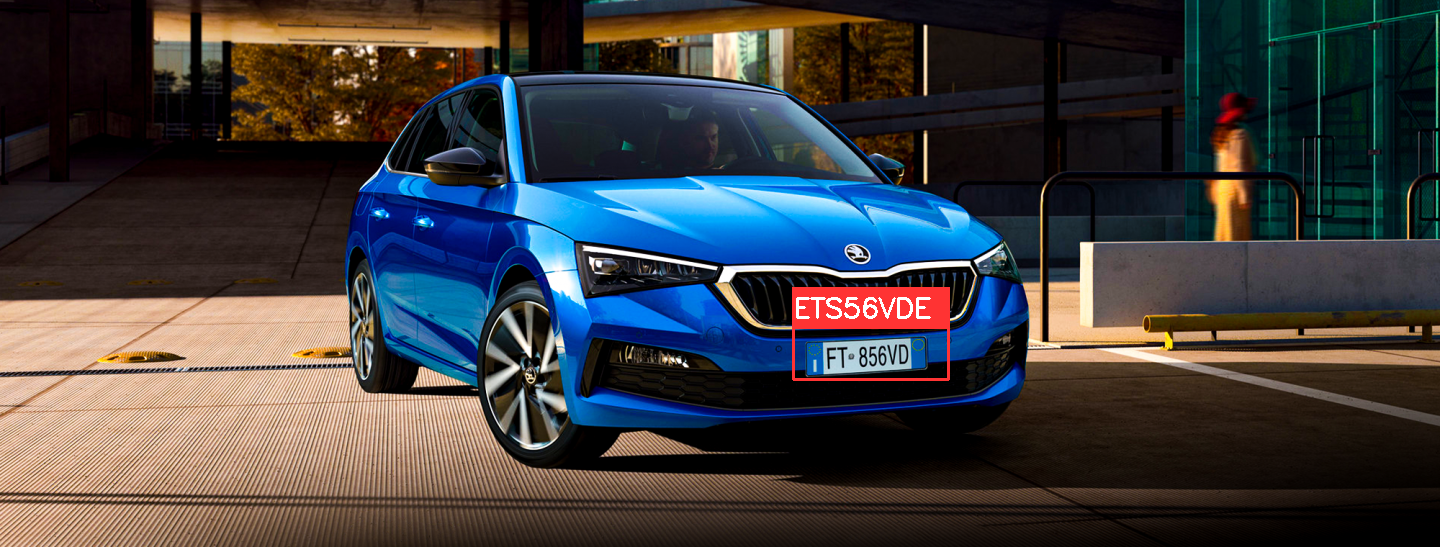

In [ ]:


import cv2
import numpy as np
import pytesseract
from google.colab.patches import cv2_imshow

pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'

cascade = cv2.CascadeClassifier("haarcascade_russian_plate_number.xml")

states = {
    "AN": "Andaman and Nicobar", "AP": "Andhra Pradesh", "AR": "Arunachal Pradesh",
    "AS": "Assam", "BR": "Bihar", "CH": "Chandigarh", "DN": "Dadra and Nagar Haveli",
    "DD": "Daman and Diu", "DL": "Delhi", "GA": "Goa", "GJ": "Gujarat", "HR": "Haryana",
    "HP": "Himachal Pradesh", "JK": "Jammu and Kashmir", "KA": "Karnataka", "KL": "Kerala",
    "LD": "Lakshadweep", "MP": "Madhya Pradesh", "MH": "Maharashtra", "MN": "Manipur",
    "ML": "Meghalaya", "MZ": "Mizoram", "NL": "Nagaland", "OD": "Odisha", "PY": "Puducherry",
    "PB": "Punjab", "RJ": "Rajasthan", "SK": "Sikkim", "TN": "Tamil Nadu", "TR": "Tripura",
    "UP": "Uttar Pradesh", "WB": "West Bengal", "CG": "Chhattisgarh", "TS": "Telangana",
    "JH": "Jharkhand", "UK": "Uttarakhand"
}

def extract_num(img_filename):
    img = cv2.imread(img_filename)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect license plate
    nplate = cascade.detectMultiScale(gray, 1.1, 4)

    for (x, y, w, h) in nplate:
        wT, hT, cT = img.shape
        a, b = (int(0.02 * wT), int(0.02 * hT))
        plate = img[y + a:y + h - a, x + b:x + w - b, :]

        # Enhance image
        kernel = np.ones((1, 1), np.uint8)
        plate = cv2.dilate(plate, kernel, iterations=1)
        plate = cv2.erode(plate, kernel, iterations=1)

        plate_gray = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)
        _, plate = cv2.threshold(plate_gray, 127, 255, cv2.THRESH_BINARY)

        # OCR to extract text
        read = pytesseract.image_to_string(plate, config='--psm 8')
        read = ''.join(e for e in read if e.isalnum())
        stat = read[0:2]

        # Draw rectangle and label
        cv2.rectangle(img, (x, y), (x + w, y + h), (51, 51, 255), 2)
        cv2.rectangle(img, (x - 1, y - 40), (x + w + 1, y), (51, 51, 255), -1)
        cv2.putText(img, read, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 255, 255), 2)

        print("Detected Plate Number:", read)
        print("State:", states.get(stat, "State not recognized"))

        # Show cropped plate and result
        cv2_imshow(plate)

    # Save and display the result
    cv2.imwrite("Result.png", img)
    cv2_imshow(img)

extract_num("car_img.png")
